In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plot

In [3]:
dData = pd.read_csv("day.csv")

In [4]:
hData = pd.read_csv("hour.csv")

In [5]:
dData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
dData.shape

(731, 16)

In [12]:
dData.holiday.value_counts()

0    710
1     21
Name: holiday, dtype: int64

In [9]:
hData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
hData.shape

(17379, 17)

In [11]:
hData.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

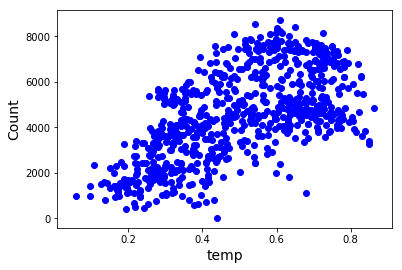

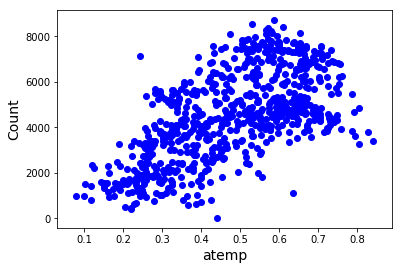

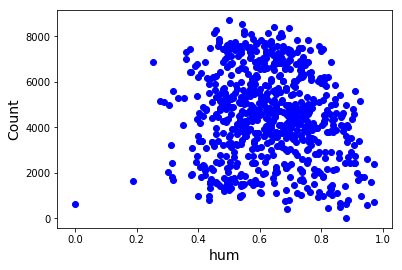

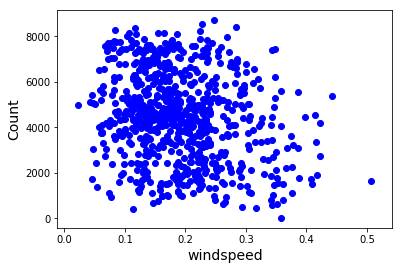

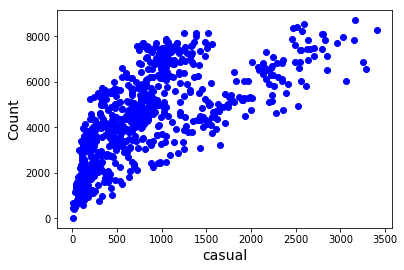

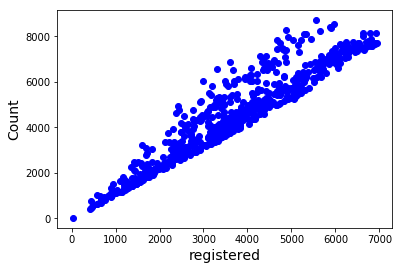

In [61]:
%matplotlib inline
for i in ["temp","atemp","hum","windspeed","casual","registered"]:
    plot.scatter(dData[i],dData.cnt,color="blue")
    plot.xlabel(i,fontsize=14)
    plot.ylabel("Count",fontsize=14)
    plot.show()

In [10]:
dData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
dData.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [75]:
train_X,test_X,train_Y,test_Y =  train_test_split(dData[['temp','atemp','hum','windspeed','casual','registered']],dData['cnt'],test_size=0.33,random_state=42)

In [76]:
model = LinearRegression().fit(train_X,train_Y)

In [77]:
pred=model.predict(test_X)

In [78]:
MeanSquaredError = mean_squared_error(test_Y,pred)
MeanSquaredError

2.4601862124816832e-24

In [79]:
rSquared = r2_score(test_Y,pred)
rSquared

1.0

Text(0,0.5,'Price')

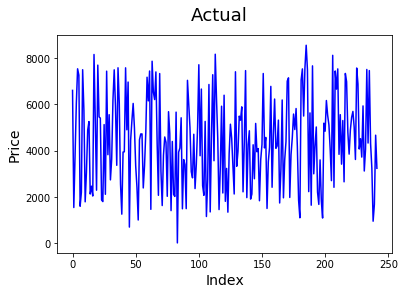

In [80]:
c = [i for i in range(0,242,1)]
figure = plot.figure()
plot.plot(c,test_Y, color="blue", linewidth=1.5)
figure.suptitle('Actual', fontsize=18)             
plot.xlabel('Index', fontsize=14)                               
plot.ylabel('Price', fontsize=14)

Text(0,0.5,'Price')

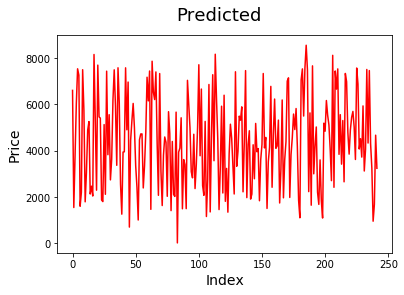

In [81]:
c = [i for i in range(0,242,1)]
figure = plot.figure()
plot.plot(c,pred, color="red",  linewidth=1.5)
figure.suptitle('Predicted', fontsize=18)             
plot.xlabel('Index', fontsize=14)                               
plot.ylabel('Price', fontsize=14)

Text(0,0.5,'Price')

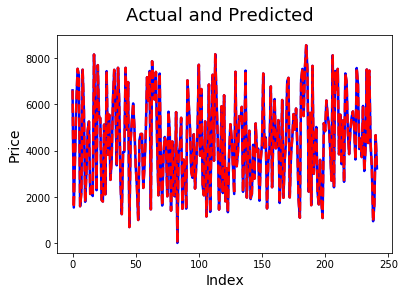

In [82]:
c = [i for i in range(0,242,1)]
figure = plot.figure()
plot.plot(c,test_Y, color="blue", linewidth=2.5,)
plot.plot(c,pred, color="red",  linewidth=2.5, linestyle="--")
figure.suptitle('Actual and Predicted', fontsize=18)             
plot.xlabel('Index', fontsize=14)                               
plot.ylabel('Price', fontsize=14)